# Integración numérica Montecarlo

**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

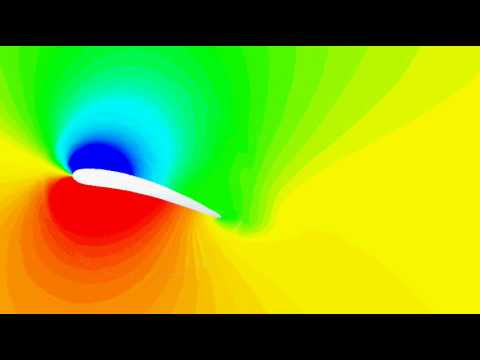

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

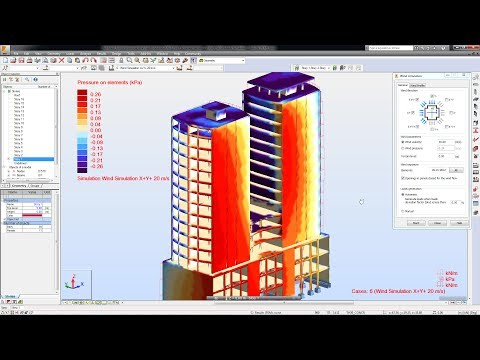

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=(x-2)^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

$$ f(x) $$

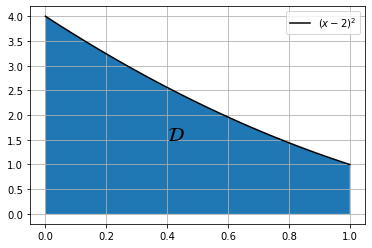

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Graficamos
x = np.linspace(0, 1, 100)
y = (x-2)**2
plt.figure()
plt.plot(x, y, "k", label="$(x-2)^2$")
plt.text(0.4, 1.5, "$\mathcal{D}$", fontsize=20)
plt.fill_between(x, y)
plt.legend(loc="best")
plt.grid()


Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}(x-2)^2\text{d}x.$$

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=(x-2)^2$ es exactamente el valor promedio de $f(x)=(x-2)^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}(x-2)^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}(u_i-2)^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

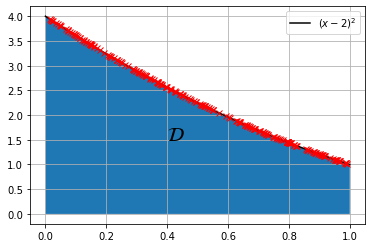

In [3]:
plt.figure()
plt.plot(x, y, "k", label="$(x-2)^2$")
plt.text(0.4, 1.5, "$\mathcal{D}$", fontsize=20)
plt.fill_between(x, y)
plt.legend(loc="best")
plt.grid()

N = 233
u = np.random.rand(N)
plt.plot(u, (u-2)**2, "xr")


**¿Cómo construir vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [32]:
def f(x):
    return (x-2)**2

N = 10000000
# np.random.seed (0)
u = np.random.rand(N) #N valores aleatorios entre 0 y 1
#u = np.random.uniform(0,1,N) misma duncion que arriba
np.mean(f(u))

2.3333014490352566

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [33]:
import pandas as pd
N = np.logspace(1,7,7) #7 ELEMENTOS DESDE 10^1 HASTA 10^7
table = pd.DataFrame(columns=["Aproximación", "Error"], index=N)
table

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN
1000000.0,NaN,NaN
10000000.0,NaN,NaN


In [34]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

In [35]:
for i in N:
    table.loc[i, "Aproximación"] = montecarlo(f, int(i), 0, 1)
table

,Aproximación,Error
10.0,2.315241,NaN
100.0,2.471112,NaN
1000.0,2.305055,NaN
10000.0,2.337738,NaN
100000.0,2.332476,NaN
1000000.0,2.333901,NaN
10000000.0,2.333425,NaN


In [38]:
table["Error"] = np.abs(7/3 - table ["Aproximación"]) #7/3 resultado de integral
table

,Aproximación,Error
10.0,2.315241,0.018092
100.0,2.471112,0.137778
1000.0,2.305055,0.028278
10000.0,2.337738,0.004405
100000.0,2.332476,0.000858
1000000.0,2.333901,0.000568
10000000.0,2.333425,0.000092


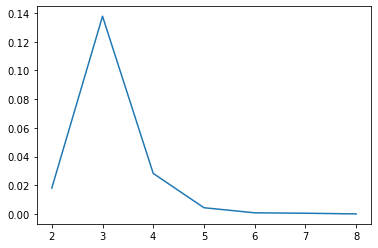

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([2, 3, 4, 5, 6, 7, 8], table["Error"])

In [36]:
N

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07])

Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i),$$

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i).$$

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

## Actividad por separado

In [247]:
def f(x):
    
    return np.exp(x**2)


N = 10000000
# np.random.seed (0)
u = np.random.uniform(2,2.1,N) 
np.mean(f(u))*(2.1-2)

6.737682853708887

In [248]:
import pandas as pd
N = np.logspace(1,5,5) #5 terminos
table1 = pd.DataFrame(columns=["Aproximación", "Error"], index=N)

In [249]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

In [250]:
for i in N:
    table1.loc[i, "Aproximación"] = montecarlo(f, int(i), 2, 2.1)

In [251]:
table1["Error"] = np.abs(6.74 - table1 ["Aproximación"]) 
table1

,Aproximación,Error
10.0,6.689484,0.050516
100.0,6.729047,0.010953
1000.0,6.781937,0.041937
10000.0,6.744875,0.004875
100000.0,6.738793,0.001207


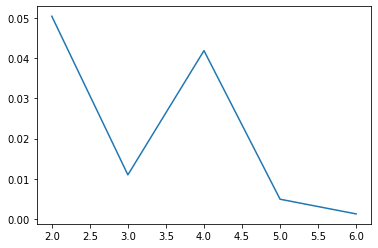

In [252]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([2, 3, 4, 5, 6], table1["Error"])

In [253]:
#Ejercicio 2

In [254]:
def f(x):
    
    return 1/np.log(x)


N = 10000000
# np.random.seed (0)
u = np.random.uniform(2,2.1,N) 
np.mean(f(u))*(2.1-2)

0.13938000766914402

In [255]:
import pandas as pd
N = np.logspace(1,5,5) 
table2 = pd.DataFrame(columns=["Aproximación", "Error"], index=N)

In [256]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

In [257]:
for i in N:
    table2.loc[i, "Aproximación"] = montecarlo(f, int(i), 2, 2.1)

In [258]:
table2["Error"] = np.abs(0.139 - table2 ["Aproximación"]) 
table2

,Aproximación,Error
10.0,0.139565,0.000565
100.0,0.139345,0.000345
1000.0,0.139471,0.000471
10000.0,0.139403,0.000403
100000.0,0.13938,0.00038


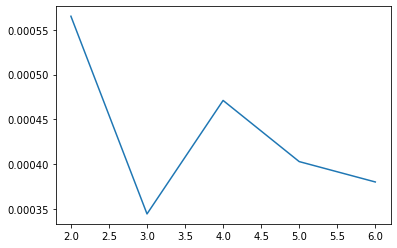

In [259]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([2, 3, 4, 5, 6], table2["Error"])

In [260]:
#Ejercicio 3

In [261]:
def f(x):
    
    return np.sin(x)/x


N = 10000000
# np.random.seed (0)
u = np.random.uniform(2,2.1,N) 
np.mean(f(u))*(2.1-2)

0.04328620466558282

In [262]:
import pandas as pd
N = np.logspace(1,5,5) 
table3 = pd.DataFrame(columns=["Aproximación", "Error"], index=N)

In [263]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

In [264]:
for i in N:
    table3.loc[i, "Aproximación"] = montecarlo(f, int(i), 2, 2.1)

In [265]:
table3["Error"] = np.abs(0.043 - table3 ["Aproximación"]) #integral
table3

,Aproximación,Error
10.0,0.043008,0.000008
100.0,0.043236,0.000236
1000.0,0.043263,0.000263
10000.0,0.043289,0.000289
100000.0,0.043284,0.000284


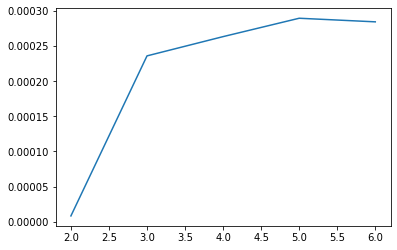

In [266]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([2, 3, 4, 5, 6], table3["Error"])

# Ejercicio puntos extras

Evaluar las 3 funciones con Montecarlo. Sacar el valor correcto de Wolfram. Tener UNA tabla con f1 error f2 error f3 error.

In [220]:
def f1(x):
    
    return np.exp(x**2)
def f2(x):
    
    return 1/np.log(x)
def f3(x):
    
    return np.sin(x)/x


N = 10000000
# np.random.seed (0)
u = np.random.uniform(2,2.1,N) 
np.mean(f(u))*(2.1-2)

0.043284990434814014

In [221]:
import pandas as pd
N = np.logspace(1,5,5) #5 terminos
table = pd.DataFrame(columns=["Aproximación 1","Error 1","Aproximación 2","Error 2","Aproximación 3", "Error 3"], index=N)

In [222]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a)

In [223]:
for i in N:
    table.loc[i, "Aproximación 1"] = montecarlo(f, int(i), 2, 2.1)
    table.loc[i, "Aproximación 2"] = montecarlo(f, int(i), 2, 2.1)
    table.loc[i, "Aproximación 3"] = montecarlo(f, int(i), 2, 2.1)

In [224]:
table["Error 1"] = np.abs(6.74 - table ["Aproximación 1"]) 
table["Error 2"] = np.abs(0.139 - table ["Aproximación 2"])
table["Error 3"] = np.abs(0.043 - table ["Aproximación 3"]) 
table

,Aproximación 1,Error 1,Aproximación 2,Error 2,Aproximación 3,Error 3
10.0,0.042403,6.697597,0.043569,0.095431,0.04291,0.00009
100.0,0.043334,6.696666,0.04331,0.09569,0.043379,0.000379
1000.0,0.043326,6.696674,0.043325,0.095675,0.043274,0.000274
10000.0,0.043285,6.696715,0.043297,0.095703,0.043281,0.000281
100000.0,0.043281,6.696719,0.043287,0.095713,0.04328,0.00028


In [225]:
table = pd.DataFrame(table)
table.drop(['Aproximación 1', 'Aproximación 2', 'Aproximación 3' ], axis=1)

,Error 1,Error 2,Error 3
10.0,6.697597,0.095431,0.00009
100.0,6.696666,0.09569,0.000379
1000.0,6.696674,0.095675,0.000274
10000.0,6.696715,0.095703,0.000281
100000.0,6.696719,0.095713,0.00028


___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

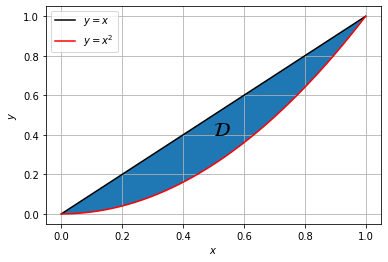

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x) :
    return x
def f2(x) :
    return x**2

x = np.linspace(0, 1, 1000)
plt.plot(x, f1(x), "k", label="$y=x$")
plt.plot(x, f2(x), "r", label="$y=x^2$")
plt.fill_between(x, f1(x), f2(x))
plt.text(0.5, 0.4, "$\mathcal{D}$", fontsize=20)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc="best")
plt.grid()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

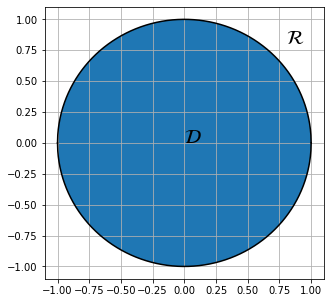

In [27]:
# x**2 + y**2 = r**2
x = np.linspace(-1, 1, 1000)
def circuloS(x) :
    return np.sqrt(1 - x**2)
def circuloI(x) :
    return - np.sqrt(1 - x**2)

plt.figure(figsize=(5, 5))
plt.plot(x, circuloS(x), "k")
plt.plot(x, circuloI(x), "k")
plt.fill_between(x, circuloS(x), circuloI(x))
plt.text(0, 0, "$\mathcal{D}$", fontsize=20)
plt.text(0.8, 0.8, "$\mathcal{R}$", fontsize=20)
plt.grid()


Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de $\theta$ se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

De nuevo, comparemos con el valor exacto.

Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

___
## Error de aproximación de integrales por montecarlo
Ver [documento mit](https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf), página 5.